<a href="https://colab.research.google.com/github/aszapla/Curso-DL/blob/master/2_1_2_Teor%C3%ADa_Redes_Neuronales_Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1.2. Redes neuronales convolucionales

* Una red neuronal convolucional (*Convolutional Neural Network* o CNN) es un tipo de red neuronal artificial donde las neuronas imitan los campos receptivos de las neuronas de la corteza visual primaria de un cerebro biológico. 

* Son una variación de los MLP, sin embargo, debido a que su aplicación se realiza en matrices bidimensionales, funcionan muy bien en tareas de visión artificial, como la clasificación o segmentación de imágenes, entre otras.

* [En 1989 Yann LeCun](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf) propuso el uso de las CNN para aplicaciones en visión por computador, y un año después publicó la red conocida como [LeNet](https://papers.nips.cc/paper/293-handwritten-digit-recognition-with-a-back-propagation-network.pdf) para el reconocimiento de dígitos manuscritos. 

<br>
<p align="center">
![Deep Learning Timeline](http://www.dlsi.ua.es/~jgallego/deepraltamira/deep_learning_timeline_cnn.png)
</p>
<br>

* Posteriormente se publicaron muchos artículos sobre el uso de CNN pero sin resultados muy destacables, hasta que en [2012, Krizhevsky, Sutskever y Hinton](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), publicaron la red conocida como **AlexNet**, ganando el concurso de clasificación de imágenes ImageNet:

<br>
<p align="center">
![ImagetNet contest](http://www.dlsi.ua.es/~jgallego/deepraltamira/cnn_imagenet.png)
</p>
<br>


* En general, las redes CNN están formadas por una o más capas convolucionales seguidas de una o más capas tipo MLP (aquí llamadas "capas totalmente conectadas" o *Fully Connected*). 

<br>
<p align="center">
![Red Neuronal Convolucional](http://www.dlsi.ua.es/~jgallego/deepraltamira/cnn_typical.png)
</p>
<br>

* En las capas convolucionales se realiza la extracción de características de la imagen (colores, gradientes, bordes, esquinas, formas, etc.). 

* Después de cada capa convolucional se suele disminiuir su dimensionalidad (*subsampling*) para que las capas más profundas puedan aprender características cada vez más complejas (combinando las carcterísticas extraídas previamente).

<br>
<p align="center">
![Red Neuronal Convolucional](http://www.dlsi.ua.es/~jgallego/deepraltamira/cnn_feature_hierarchy.png)
</p>
<br>

* En las capas *fully connected* finales se realiza un mapeo no-lineal de las características extraídas de la imagen a las categorías a clasificar. 

* Este tipo de redes también pueden ser aplicadas para la clasificación de series temporales o señales de audio utilizando **convoluciones 1D**, así como para la clasificación de datos volumétricos usando **convoluciones 3D**.


## Operación de convolución

* La operación de convolución (convolución discreta) recibe como entrada un array 2D (una imagen) y aplica sobre ella un filtro o ***kernel*** que nos devuelve un mapa con las características extraídas de la imagen original. 

* La salida de cada neurona convolucional se calcula como:

\begin{equation}
    y = f \Big(b + \sum K \otimes x_n \Big)
\end{equation}

  * Donde: La salida $y$ es una matriz que se calcula por medio de la combinación lineal de las entradas $x_n$ recibidas de las neuronas en la capa anterior,  operadas con el núcleo o ***kernel*** de convolución $K$ correspondiente, se le añade el bias $b$ y por último se pasa por la función de activación $f$.


<br>
<p align="center">
![Convolucion](http://www.dlsi.ua.es/~jgallego/deepraltamira/convolution.jpg)
</p>
<br>


* El resultado obtenido se ha calculado de la forma: 


        Píxel = 105 * 0  + 102 * -1 + 100 * 0
              + 103 * -1 +  99 * 5  + 103 * -1
              + 101 * 0  +  98 * -1 + 104 * 0
              = 89



* El resultado obtenido se guarda en el píxel central de la posición sobre la que se ha aplicado el *kernel*, por este motivo las dimensiones de los kernels suelen ser impares. 


* La operación de convolución transforma los datos de tal manera que ciertas características (determinadas por el *kernel* utilizado) se resaltan en la imagen de salida. 


<br>
<p align="center">
![Ejemplos de resultados de convolución con distintos kernels](http://www.dlsi.ua.es/~jgallego/deepraltamira/convolution_results.png)
</p>
<br>





<br>

&#10158; A continuación se incluye un ejemplo de cómo aplicar una convolución con distintos kernels sobre una imagen.

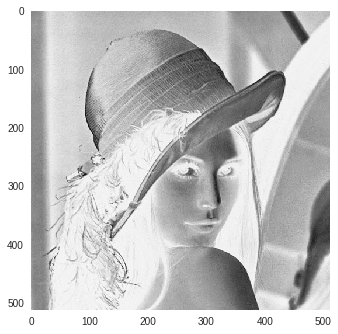

Matriz de píxeles de la imagen:
[[131 137 131 ...  96  96  96]
 [132 135 133 ...  96  98  99]
 [134 132 135 ...  98  99 100]
 ...
 [110 109 114 ...  47  47  48]
 [107 109 111 ...  47  47  51]
 [101 107 109 ...  47  48  54]]
Dimensiones de la imagen:
(512, 512)


In [0]:
"""
En primer lugar descargamos la imagen que vamos a utilizar y mostramos 
los datos de la misma.
"""

# Descargamos una imagen de prueba
!wget -q http://www.dlsi.ua.es/~jgallego/deepraltamira/sample_lenna.jpg

# Importamos las librerías de Matplotlib y de OpenCV
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Leemos la imagen descargada
img = cv2.imread('sample_lenna.jpg', cv2.IMREAD_GRAYSCALE)

# Mostramos los datos de la imagen
plt.imshow(img)
plt.grid(False)
plt.show()

print('Matriz de píxeles de la imagen:')
print(img)

print('Dimensiones de la imagen:')
print(img.shape)

Convolución con Kernel:
[[ 5  0 -5]
 [ 0  0  0]
 [-5  0  5]]


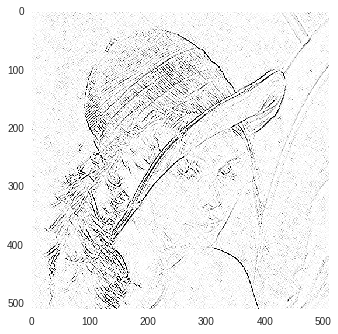

Convolución con Kernel:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


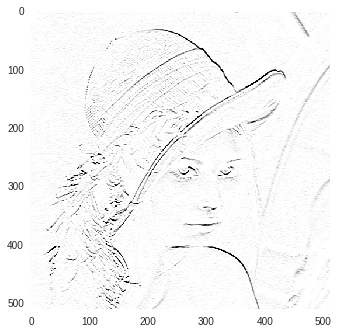

Convolución con Kernel:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


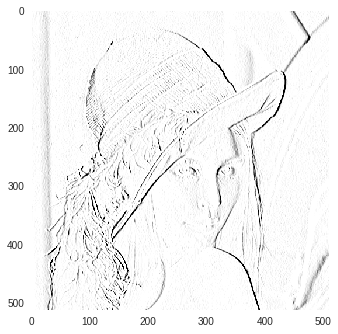

In [0]:
"""
Y a continuación aplicamos diferentes Kernels sobre esta imagen
"""

# -------------------------------------
def convolve2d_and_show(image, kernel):
  out = cv2.filter2D(src=img, kernel=kernel, ddepth=-1)
  print("Convolución con Kernel:")
  print(kernel)
  plt.imshow(out)
  plt.grid(False)
  plt.show()

kernel = np.array([[5,0,-5], [0,0,0], [-5,0,5]])
convolve2d_and_show(img, kernel)

kernel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]]) 
convolve2d_and_show(img, kernel)


kernel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]]) 
convolve2d_and_show(img, kernel)


Pero...

¿tenemos que establecer nosotros manualmente los pesos de los kernels que van a usar las convoluciones?

No, **los pesos se aprenden** durante el entrenamiento. 

De esta forma se aprenderán los *kernels* o filtros más adecuados para clasificar los tipos de imágenes suministrados durante el entrenamiento. 

Este tipo de aprendizaje se denomina "*feature learning*" (aprendizaje de características o de representación).

## Capas de convolución

* Cada una de las capas de convolución de la red puede aplicar uno o más filtros.

<br>
<p align="center">
![Conjunto de Kernels de una capa convolucional](http://www.dlsi.ua.es/~jgallego/deepraltamira/array_kernels.png)
</p>
<br>

* Cada uno de los filtros de la capa se especializará en detectar un tipo de característica de la imagen de entrada. 

<br>
<p align="center">
![Filtros aprendidos](http://www.dlsi.ua.es/~jgallego/deepraltamira/filters.jpg)
</p>
<br>

* Los mapas de caracteríscas obtenidos se suman, se les añade el *bias* (también aprendido) y al resultado se le aplica la función de activación. 

<br>
<p align="center">
![Suma de convoluciones](http://www.dlsi.ua.es/~jgallego/deepraltamira/convolution_addition1.png)
</p>
<br>

## Subsampling

* Después de cada capa de convolución normalmente se aplica una operación de subsampling. 

* Las técnicas más utilizadas para realizar esta operación son **Max-Pooling** y **Average Pooling**.

* En ambos casos se aplica un filtro (de dimensiones $w \times h$) sobre la imagen de entrada y se guarda el máximo (o la media en el caso del *Average Pooling*) de cada región en la matriz de salida.

* A continuación se muestra un ejemplo de cómo se aplicaría un filtro de Max-Pooling de tamaño de 2x2:

<br>
<p align="center">
![Max Pooling](http://www.dlsi.ua.es/~jgallego/deepraltamira/max_pooling.png)
</p>
<br>

* El objetivo es reducir el tamaño de la imagen de entrada quedándonos con las características más relevantes.


## Jearquía de características

* Al aplicar consecutivamente, capa tras capa, operaciones de convolución seguidas de subsampling obtenemos una arquitectura o topología de red como la siguiente: 


<br>
<p align="center">
![Jerarquía de capas en CNN](http://www.dlsi.ua.es/~jgallego/deepraltamira/cnn_jerarquia.png)
</p>
<br>

* En las primeras capas los filtros solo se aplican sobre una pequeña parte de la imagen. 

* Pero después de varias operaciones de subsampling los filtros aplicados pueden ver toda la imagen. 

* Esto crea una jerarquía de características en la que en las primeras capas se aprenden filtros de más bajo nivel (bordes, colores, gradientes, etc.) y progresivamente se van combinando y aprendiendo características de más alto nivel. 

<br>
<p align="center">
![Jerarquía de características](http://www.dlsi.ua.es/~jgallego/deepraltamira/cnn_feature_hierarchy_2.png)
</p>
<br>

* Las características extraídas en las últimas capas de convolución han sido depuradas hasta llegar a una serie de características únicas que permitan discriminar la clase de la que se trata la imagen de entrada. 






## Capa *Fully connected*

* Las últimas capas de la CNN se encargan de clasificar las características extraídas de la imagen en una de las posibles categorías. 

* Estas últimas capas suelen ser de tipo *Fully Connected* (capas totalmente conectadas), que son equivalentes a las Redes Neuronales o MLP que vimos previamente. 

* Para transformar los mapas de características (que son matrices 2D) en un vector 1D se realiza una operación llamada ***Flatten*** (aplanar).

* Esta operación simplemente consiste en redimensionar los mapas de características de salida en un vector 1D: 


<br>
<p align="center">
![Operación flatten](http://www.dlsi.ua.es/~jgallego/deepraltamira/flatten1.png)
</p>
<br>

## Redes CNN con Keras

* En Keras disponemos de las clases `Conv2D`, `MaxPooling2D` y `Flatten` para crear una red neuronal convolucional. 


* La clase [Conv2D](https://keras.io/layers/convolutional/#conv2d)  permite añadir capas convolucionales a la red.

  Como parámetros recibe el número de filtros y el tamaño de los kernels, por ejemplo "`Conv2D(32, (3, 3))`" crearía una capa con 32 filtros de tamaño 3x3. 

* [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) añade una capa para aplicar esta operación con el tamaño indicado como parámetro. 

  Por ejemplo `MaxPooling2D(pool_size=(2, 2))`.

* La clase [Flatten](https://keras.io/layers/core/#flatten) realiza esta operación a partir de las entradas recibidas, devolviendo un vector 1D. 

<br>

&#10158; A continuación vamos a ver un ejemplo sencillo de cómo clasificar la base de datos MNIST usando una Red Neuronal Convolucional.

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


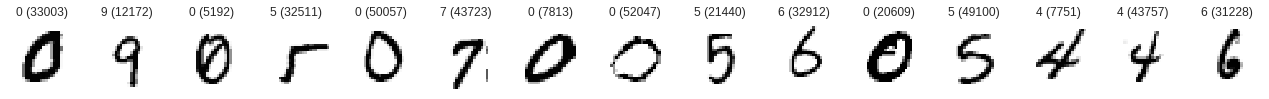

Datos para entrenamiento:
 - x_train: (60000, 28, 28)
 - y_train: (60000,)
Datos para evaluación:
 - x_test: (10000, 28, 28)
 - y_test: (10000,)


In [0]:
"""
En primer lugar descargamos la base de datos y mostramos algunas imágenes
"""

import matplotlib.pyplot as plt
import numpy as np
import keras
from tensorflow import set_random_seed

set_random_seed(1)  # Fijamos la semilla de TF
np.random.seed(1)  # Fijamos la semilla

# Descargamos la base de datos
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Mostramos algunas imágenes
n = 15
index = np.random.randint(len(x_train), size=n)
plt.figure(figsize=(n*1.5, 1.5))
for i in np.arange(n):
    ax = plt.subplot(1,n,i+1)
    ax.set_title('{} ({})'.format(y_train[index[i]],index[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(x_train[index[i]])
plt.show()

# Mostramos las dimensiones de los datos
print('Datos para entrenamiento:')
print(' - x_train: {}'.format(str(x_train.shape)))
print(' - y_train: {}'.format(str(y_train.shape)))
print('Datos para evaluación:')
print(' - x_test: {}'.format(str(x_test.shape)))
print(' - y_test: {}'.format(str(y_test.shape)))

In [0]:
"""
Preparamos los datos para la red
"""

# Redimensionamos para añadir el canal
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Transformamos a decimal
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# Normalizamos entre 0 y 1
x_train /= 255.
x_test /=  255.

# Transformamos las etiquetas a categórico (one-hot)
NUM_LABELS = 10
y_train  = keras.utils.to_categorical(y_train, NUM_LABELS)
y_test = keras.utils.to_categorical(y_test, NUM_LABELS)


# Mostramos (de nuevo) las dimensiones de los datos
print('Datos para entrenamiento:')
print(' - x_train: {}'.format(str(x_train.shape)))
print(' - y_train: {}'.format(str(y_train.shape)))
print('Datos para evaluación:')
print(' - x_test: {}'.format(str(x_test.shape)))
print(' - y_test: {}'.format(str(y_test.shape)))

Datos para entrenamiento:
 - x_train: (60000, 28, 28, 1)
 - y_train: (60000, 10)
Datos para evaluación:
 - x_test: (10000, 28, 28, 1)
 - y_test: (10000, 10)


In [0]:
"""
Definimos la CNN a utilizar y la entrenamos
"""

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# Capa convolucional con 8 filtros de tamaño 3x3 seguida de un MaxPooling de 2x2
model.add(Conv2D(8, (3, 3), activation='relu', name='conv1', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional con 4 filtros de tamaño 3x3 seguida de un MaxPooling de 2x2
model.add(Conv2D(4, (3, 3), activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa Fully Connected de salida con función de activación Softmax
model.add(Flatten())
model.add(Dense(NUM_LABELS, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

history = model.fit(x_train, y_train, validation_split=0.33, 
                    batch_size=32, epochs=5, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,382
Trainable params: 1,382
Non-trainable params: 0
_________________________________________________________________
None
Tra

40199/40199 [==============================] - 17s 415us/step - loss: 0.6034 - acc: 0.8110 - val_loss: 0.2540 - val_acc: 0.9235
Epoch 2/5
40199/40199 [==============================] - 14s 350us/step - loss: 0.2229 - acc: 0.9346 - val_loss: 0.2037 - val_acc: 0.9416
Epoch 3/5
16896/40199 [===========>..................] - ETA: 7s - loss: 0.1795 - acc: 0.9479

40199/40199 [==============================] - 16s 390us/step - loss: 0.1749 - acc: 0.9482 - val_loss: 0.1726 - val_acc: 0.9488
Epoch 4/5
40199/40199 [==============================] - 17s 432us/step - loss: 0.1535 - acc: 0.9550 - val_loss: 0.1439 - val_acc: 0.9581
Epoch 5/5
10624/40199 [======>.......................] - ETA: 11s - loss: 0.1389 - acc: 0.9583

40199/40199 [==============================] - 18s 457us/step - loss: 0.1376 - acc: 0.9583 - val_loss: 0.1447 - val_acc: 0.9573


Mostramos las curvas de aprendizaje


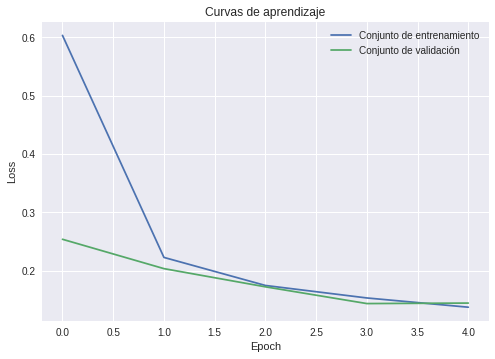

Resultado en el test set:
Test loss: 0.1286
Test accuracy: 96.11%


In [0]:
"""
Mostramos las curvas de aprendizaje y evaluamos usando el test set
"""

# -----------------------------
def plot_learning_curves(hist):
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Curvas de aprendizaje')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Conjunto de entrenamiento', 'Conjunto de validación'], loc='upper right')
  plt.show()

print('Mostramos las curvas de aprendizaje')
plot_learning_curves(history)


# Evaluamos usando el test set
score = model.evaluate(x_test, y_test, verbose=0)

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))


Filtros aprendidos por la primera capa:
(60000, 26, 26, 8)


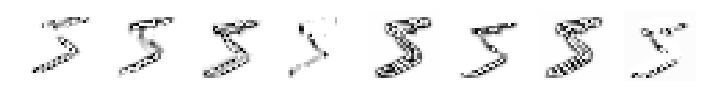

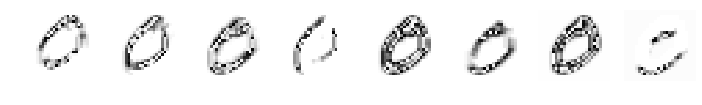

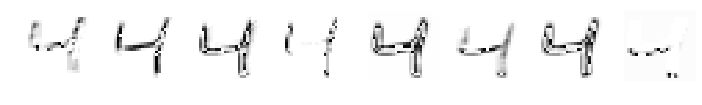

Filtros aprendidos por la segunda capa:
(60000, 11, 11, 4)


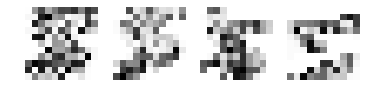

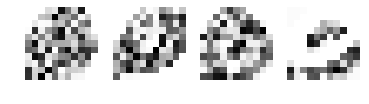

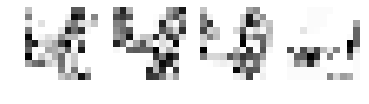

In [0]:
"""
Mostramos los filtros aprendidos por la red
"""

# --------------------------------
def plot_figures(images):
  width = images.shape[0]
  n_filters = images.shape[2]
  plt.figure(figsize=(1.5 * n_filters, 1.5))
  for i in range(n_filters):
    ax = plt.subplot(1,n_filters,i+1)
    plt.grid('off')
    plt.axis('off')
    plt.imshow(np.array(images[:,:,i] * 255., dtype=np.uint8))
  plt.show()


print('Filtros aprendidos por la primera capa:')
modelConv = Model(inputs=model.input, outputs=model.get_layer("conv1").output)
predictions = modelConv.predict(x_train)
print(predictions.shape)
plot_figures(predictions[0])
plot_figures(predictions[1])
plot_figures(predictions[2])

print('Filtros aprendidos por la segunda capa:')
modelConv = Model(inputs=model.input, outputs=model.get_layer("conv2").output)
predictions = modelConv.predict(x_train)
print(predictions.shape)
plot_figures(predictions[0])
plot_figures(predictions[1])
plot_figures(predictions[2])


## Aumentado de datos

* Como ya vimos previamente, cuando tenemos pocos datos o la variabilidad de estos datos es reducida, podemos utilizar la técnica de aumentado de datos (***data augmentation***).

* Esta técnica consiste en generar más datos de entrenamiento a partir de los datos ya existentes. 

* Para esto se aplican transformaciones sobre las muestras de entrenamiento, como rotaciones, escalado, desplazamientos, flips (dar la vuelta), cambios de color, añadiendo ruido o suavizado, etc.


<br>
<p align="center">
![Aumentado de datos](http://www.dlsi.ua.es/~jgallego/deepraltamira/data_augmentation1.png)
</p>
<br>


* En Keras podemos utilizar la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#image-preprocessing) para generar en tiempo real muestras de entrenamiento con transformaciones aleatorias.

* **Importante:** Para entrenar el modelo tendremos que llamar al método "`fit_generator`" en lugar de a "`fit`".


<br>

&#10158; A continuación vamos a ver un código de ejemplo:.




Epoch 1/1
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2378 - acc: 0.9255
Transformaciones generadas sobre un dígito:


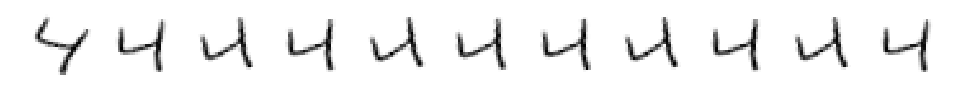

In [0]:
"""
Importamos la clase ImageDataGenerator y llamamos a fit_generator...
"""

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=25)  # Solo aplicamos rotaciones

model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=1)


# Vamos a mostrar algunas de las imágenes que genera
print('Transformaciones generadas sobre un dígito:')
plt.figure(figsize=(1.5 * 11, 1.5))
for idx, img_batch in enumerate(datagen.flow(np.array([x_train[2]]), batch_size=1)):
  ax = plt.subplot(1, 11, idx+1)
  plt.axis('off')
  plt.grid('off')
  plt.imshow(img_batch[0,:,:,0])
  if idx > 9:
    break
    
plt.show()      
  

## CNN Hall of Fame

* Año tras año la potencia y precisión de las redes CNN ha ido mejorando. 


<br>
<p align="center">
![ImageNet contest](http://www.dlsi.ua.es/~jgallego/deepraltamira/imagenet_contest.png)
</p>
<br>


* Mejorar la precisión o acierto de las redes no siempre quiere decir añadir más capas o más parámetros. 


<br>
<p align="center">
![Redes](http://www.dlsi.ua.es/~jgallego/deepraltamira/applications.png)
</p>
<br>


* Keras incluye la implementación de algunas de las redes más utilizadas [https://keras.io/applications/](https://keras.io/applications/)

* Además incluye pesos "pre-entrenados" para ImageNet, lo que nos permite utilizar estas redes directamente o aplicar un proceso de "fine-tuning" para ajustar los pesos a nuestra base de datos. 





&nbsp;

&nbsp;


---


<font size="3">
**[&#10158;  Vamos a practicar &#10158; ](https://colab.research.google.com/drive/1-l_XHSWSwKXyGc7hm5Mp-hBH4TCs26ka)**
</font>



---